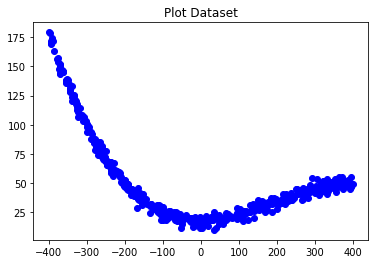

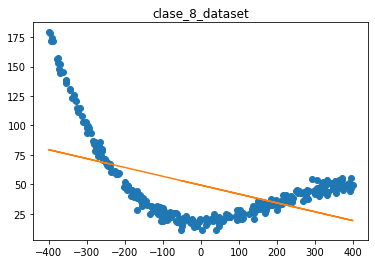

In [40]:
import time
import numpy as np
import matplotlib.pyplot as plt

class Data(object):

    def __init__(self, path):
        self.dataset = self._build_dataset(path)

    def _build_dataset(self, path):
        structure = [('entrada', np.float),
                     ('salida', np.float)]

        with open(path, encoding="utf8") as data_csv:

            data_gen = ((float(line.split(',')[0]), float(line.split(',')[1])) # add here + 10 in second value
                        for i, line in enumerate(data_csv) if i != 0)
            embeddings = np.fromiter(data_gen, structure)

        return embeddings

    def split(self, percentage): # 0.8
        X = self.dataset['entrada']
        y = self.dataset['salida']


        permuted_idxs = np.random.permutation(X.shape[0])
 

        train_idxs = permuted_idxs[0:int(percentage * X.shape[0])]
   

        test_idxs = permuted_idxs[int(percentage * X.shape[0]): X.shape[0]]
   
        X_train = X[train_idxs]
        X_test = X[test_idxs]

        y_train = y[train_idxs]
        y_test = y[test_idxs]

        return X_train, X_test, y_train, y_test


class BaseModel(object):

    def __init__(self):
        self.model = None

    def fit(self, X, Y):
        return NotImplemented

    def predict(self, X):
        return NotImplemented

class LinearRegressionWithB(BaseModel):

    def fit(self, X, y):
        X_expanded = np.vstack((X, np.ones(len(X)))).T
        W = np.linalg.inv(X_expanded.T.dot(X_expanded)).dot(X_expanded.T).dot(y)
        self.model = W

    def predict(self, X):
        X_expanded = np.vstack((X, np.ones(len(X)))).T
        return X_expanded.dot(self.model)


class Metric(object):
    def __call__(self, target, prediction):
        return NotImplemented
    

class MSE(Metric):
    def __init__(self):
        Metric.__init__(self)

    def __call__(self, target, prediction):
        n = target.size
        return np.sum((target - prediction) ** 2) / n
    
    
class accuracy(Metric):
    def __init__(self):
        Metric.__init__(self)

    def __call__(self, target, prediction):
        correct = 0
        for i in range(len(target)):
            if target[i] <= len(y_test):
                if target[i] == prediction[i]:
                    correct += 1
        return correct / float(len(target)) * 100.0
    
def k_folds(X_train, y_train, k=5):
    regression = LinearRegressionWithB()
    error = MSE()

    chunk_size = int(len(X_train) / k)
    mse_list = []
    prediction_list=[]
    w_list=[]
    for i in range(0, len(X_train), chunk_size):
        end = i + chunk_size if i + chunk_size <= len(X_train) else len(X_train)
        new_X_valid = X_train[i: end]
        new_y_valid = y_train[i: end]
        new_X_train = np.concatenate([X_train[: i], X_train[end:]])
        new_y_train = np.concatenate([y_train[: i], y_train[end:]])
        
        #l_regression.fit(new_X_train, new_y_train)
        #prediction = l_regression.predict(new_X_valid)
        #mse_list.append(error(new_y_valid, prediction))
        
        
        # linear with b
        regression.fit(new_X_train, new_y_train)
        W_linear = regression.model
        y_linear = W_linear[0]*new_X_train + W_linear[1]
        prediction = regression.predict(new_X_valid)
        mse_list.append(error(new_y_valid, prediction))
        
        
        # quadratic
        #X_quadratic = np.vstack((np.power(new_X_train, 2), new_X_train, np.ones(len(new_X_train)))).T
        
        #expanded_new_y_train = np.vstack((new_y_train, np.ones(len(new_y_train)))).T   
        
        #regression.fit(X_quadratic, expanded_new_y_train)
        #W_quadratic = regression.model
        #y_quadratic = W_quadratic[0] * np.power(new_X_train, 2) + W_quadratic[1] * x + W_quadratic[2]
    
        # cubic
        #X_cubic = np.vstack((np.power(new_X_train, 3), np.power(new_X_train, 2), new_X_train, np.ones(len(new_X_train)))).T
        #regression.fit(X_cubic, new_y_train.reshape(-1, 1))
        #W_cubic = regression.model
        #y_cubic = W_cubic[0] * np.power(x, 3) + W_cubic[1] * np.power(x, 2) + W_cubic[2] * x + W_cubic[3]

        # X4
        #X_4 = np.vstack((np.power(new_X_train, 4),np.power(new_X_train, 3), np.power(new_X_train, 2), 
        #                 new_X_train, np.ones(len(new_X_train)))).T
        #regression.fit(X_4, new_y_train.reshape(-1, 1))
        #W_4 = regression.model
        #y_4 = W_4[0] * np.power(x, 4) + W_4[1] * np.power(x, 3)
        #+W_4[2] * np.power(x, 2) + W_4[3] * x + W_4[4] 
    
    
         # PLOTS
        plt.figure()
        plt.subplot(1, 1, 1)
        plt.gca().set_title('clase_8_dataset')
    
        
         # original
        plt.plot(new_X_train, new_y_train, 'o')
    
        # linear
        plt.plot(new_X_train, y_linear, '-')

        # quadratic
        #plt.plot(new_X_train, y_quadratic, '-')

        # cubic
        #plt.plot(new_X_train, y_cubic, '-')
    
        mean_MSE = np.mean(mse_list)
        #print(prediction_list)
        #print(w_list)
      
        return mean_MSE
    
    
if __name__ == '__main__':
    dataset = Data('C:/Users/Dicsys/Downloads/clase_8_dataset.csv')
    
    X_train, X_test, y_train, y_test = dataset.split(0.8)
    
    X_dataset=np.append(X_train,X_test)
    Y_dataset=np.append(y_train,y_test)
    
    plt.title('Plot Dataset')
    plt.scatter(X_dataset,Y_dataset, color='b', label='dataset')
    
    
    k_folds(X_train,y_train)
    